# EDA in Python2 on Titanic data by Michael Eryan

# Introduction

### The data is a sample and incomplete, so we cannot make any generalizations or definitive conclusions. My goal is just exploration, observation and some speculation.

In [1]:
#Load libraries and set working directory - import whole libraries to avoid confusion
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn import linear_model 
#did not work when imported just sklearn

%matplotlib inline
#to  make the plots show up

In [2]:
#Set the correct working directory
os.chdir(r"C:\Users\rf\Google Drive\Education\R\Rwork")

# Descriptive Statistics.

In [3]:
#Read the data and review the basic descriptive information
inputdata='titanic_data.csv'
t=pd.read_csv(inputdata) #load data into a pandas dataframe
# Automatically produced summary of the data set
print "Hello, world! Let's review my dataset."
print "\n"
print 'My data set is',inputdata
print 'I imported it into a',type(t)
print 'It has',t.shape[1],'columns and',t.shape[0],'rows.'
print "Here are the columns and their data types in the dataset:"
print t.dtypes
print "\n"
print ("Here are a few rows from this data frame:")
print t.head()
print "\n"
print "Also let's create a variable Minor - if Age <18. It will have missing values when Age does."
#how to make it missing? multi step process but works
t['Minor']=t['Age']
t.loc[(t['Age'] >=0), 'Minor'] = False
t.loc[(t['Age'] >=0) & (t['Age'] <18), 'Minor'] = True
print "\n"
print "Also add dummies for gender which will be useful later."
sdummies = pd.get_dummies(t['Sex'])
t = t.join(sdummies)

Hello, world! Let's review my dataset.


My data set is titanic_data.csv
I imported it into a <class 'pandas.core.frame.DataFrame'>
It has 12 columns and 891 rows.
Here are the columns and their data types in the dataset:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Here are a few rows from this data frame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1

In [4]:
print ("Summary statistics for the whole data set")
print t.describe()
print "\n"
print ("Survived will be my Y, Gender is the first X, Age is continuous but has missing values (I will not impute though)")
print "\n"
print ("Quick means (ignoring the missing values by default)")
print t.mean(axis=0)
print "\n"
print ("Let's also look at the distribution by requesting custom percentiles.")
print t.describe(percentiles=[0.01,.25, .5, .75, 0.99])
print "\n"
print ("Let's also describe the categorical variables.")
print t.describe(include=['object'])

Summary statistics for the whole data set
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare      female        male  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.352413    0.647587  
std      0.806057   49.693429    0.477990    0.477990  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    7.910400    0.000000    0.

# Univariate Plots and Analysis

### Single variable tabulations

In [5]:
print ("Count of missing Age and also same for minor")
survived = t.loc[:,['Survived']]
sur_count= survived.apply(pd.value_counts).fillna(0)
print sur_count
age = t.loc[:,['Age']]
print ("How many rows have missing for Age?")
print age.shape[0] - age.dropna().shape[0] 
minor = t.loc[:,['Minor']]
print ("How many rows have missing for Minor?")
print minor.shape[0] - minor.dropna().shape[0] 
print ("OK, just as expected.")
print "\n"
print ("Frequency of categoricals")
sex = t.loc[:,['Sex']]
sex_count = sex.apply(pd.value_counts).fillna(0)
print sex_count
pclass = t.loc[:,['Pclass']]
pclass_count = pclass.apply(pd.value_counts).fillna(0)
print pclass_count

Count of missing Age and also same for minor
   Survived
0       549
1       342
How many rows have missing for Age?
177
How many rows have missing for Minor?
177
OK, just as expected.


Frequency of categoricals
        Sex
male    577
female  314
   Pclass
3     491
1     216
2     184


# Bar Charts

Axes(0.125,0.125;0.775x0.775)


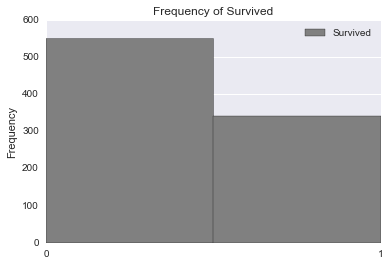

In [6]:
print t['Survived'].plot(kind='hist',bins=2,xticks=np.arange(0, 2, 1)
    ,title='Frequency of Survived',legend=True,color='grey')

Axes(0.125,0.125;0.775x0.775)


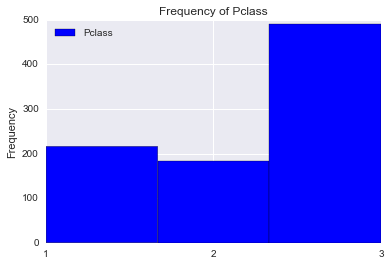

In [7]:
print t['Pclass'].plot(kind='hist',bins=3,xticks=np.arange(1, 4, 1)
    ,title='Frequency of Pclass',legend=True,color='blue')

Axes(0.125,0.125;0.775x0.775)


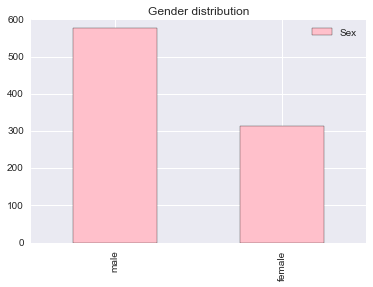

In [8]:
print sex_count.plot(kind='bar',title='Gender distribution',legend=True,color='pink')


### Fancier Charts - stacked bar chart by survived and gender 

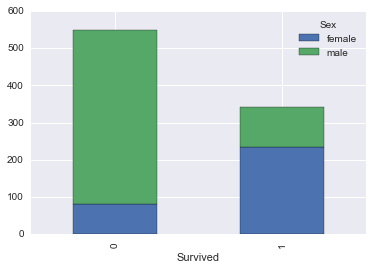

In [9]:
sur_by_sex = pd.crosstab(t.Survived,t.Sex)
sur_by_sex
sur_by_sex.plot(kind='bar', stacked=True)

### The normalized version as well

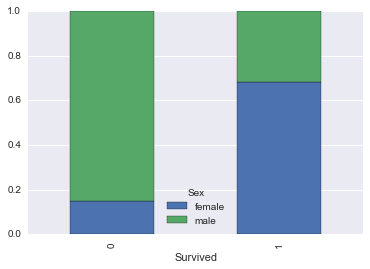

In [10]:
sur_by_sex_pcts = sur_by_sex.div(sur_by_sex.sum(1).astype(float), axis=0)
sur_by_sex_pcts.plot(kind='bar', stacked=True)

### Histogram and Density plot of Age

Axes(0.125,0.125;0.775x0.775)


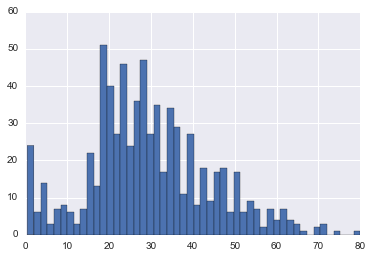

In [11]:
print t['Age'].hist(bins=50)

### Histogram and Density plot on the percent scale

(0, 70)


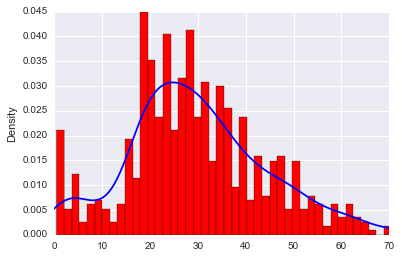

In [12]:
hist_age = t['Age'].hist(bins=50 , normed=True, color='red')
dens_age = t['Age'].plot(kind='kde' , color='blue')
print hist_age.set_xlim((0,70))


# Bivariate Plots and Analysis

### First, let's drill down into the data

In [13]:
print sur_count
print "\n"
print pd.crosstab(t.Survived, t.Sex, margins=True)
print "\n"
print pd.crosstab(t.Survived, t.Pclass, margins=True)
print "\n"
print t.pivot_table(['Age'], index=['Survived','Sex'], columns='Pclass',margins=True)


   Survived
0       549
1       342


Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891


Pclass      1    2    3  All
Survived                    
0          80   97  372  549
1         136   87  119  342
All       216  184  491  891


                       Age                                 
Pclass                   1          2          3        All
Survived Sex                                               
0        female  25.666667  36.000000  23.818182  25.046875
         male    44.581967  33.369048  27.255814  31.618056
1        female  34.939024  28.080882  19.329787  28.847716
         male    36.248000  16.022000  22.274211  27.276022
All              38.233441  29.877630  25.140620  29.699118


### How does Survived look like in absolute counts and percentages?

   Survived
0       549
1       342 

   Survived
0      62.0
1      38.0
Axes(0.125,0.125;0.775x0.775)


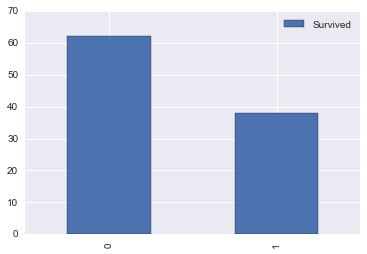

In [14]:
spct = np.round((sur_count / sur_count.sum() * 100))
print sur_count, "\n","\n", spct
print spct.plot(kind='bar')

### Now let's do a survived by gender box chart

Axes(0.125,0.125;0.775x0.775)


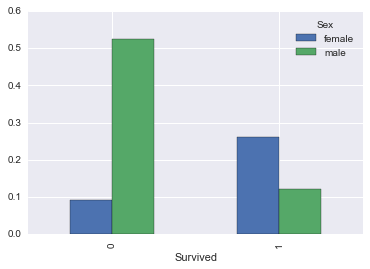

In [15]:
sg = pd.DataFrame(pd.crosstab(t.Survived, t.Sex)) 
sg2 = sg / float(sur_count.sum())
print sg2.plot(kind='bar')

### Let's make a faceted chart of Survived vs Gender

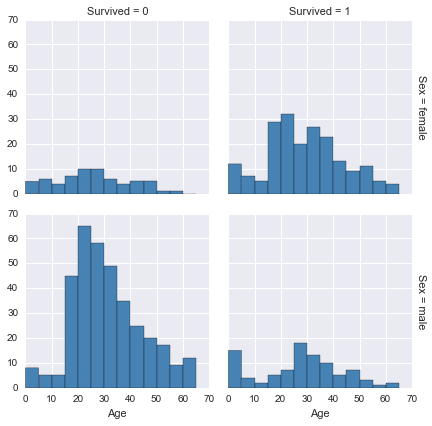

In [16]:
g = sns.FacetGrid(t, row="Sex", col="Survived", margin_titles=True, row_order=["female", "male"])
age_bins = np.arange(0, 70, 5)
g.map(plt.hist, 'Age', bins=age_bins, color="steelblue")

### Almost mirror image, but is the difference in age statistically significant? Let’s test by Anova. Need to test separately for survivors and dead by sex, but first let's calculate means by each segment.

In [17]:
age_gr = t['Age'].groupby([t['Sex'], t['Survived']]).mean().unstack()
print (age_gr)

Survived          0          1
Sex                           
female    25.046875  28.847716
male      31.618056  27.276022


### Might be a significant difference among the dead but not the survived?

In [18]:
s1 = t[t.Survived.isin([1])]
s0 = t[t.Survived.isin([0])]
#refuses to subset
t2 = t.loc[t.Age.notnull()]
age_gr2 = t2.Age.groupby([t2.Sex, t2.Survived]).groups
age_gr2
age_list = np.array(t['Age']) #need to load into np.array, and indexes look at the original t - dataframe!
m1 = age_list[age_gr2['male',1]] 
m0 = age_list[age_gr2['male',0]]
f1 = age_list[age_gr2['female',1]]
f0 = age_list[age_gr2['female',0]]

print ("First Anova test for the survivors.")
print sp.stats.f_oneway(m1,f1)
print ("No significant difference for survivors.")
print  "\n"
print sp.stats.f_oneway(m0,f0)
print ("But significant for the dead - the men who died were older than the women who died.")


First Anova test for the survivors.
F_onewayResult(statistic=0.6974204245881046, pvalue=0.40434406202205564)
No significant difference for survivors.


F_onewayResult(statistic=11.985871610851571, pvalue=0.00059076603572944322)
But significant for the dead - the men who died were older than the women who died.


### Association analysis (Pearson's chi-sq test) Gender and Class vs survived - is the different significant?


In [19]:
print ("Create a frequency table first.")
freq01 = pd.crosstab(t.Sex, t.Survived, margins=True)
print freq01
freq01t = sp.stats.chi2_contingency(freq01)
print "\n"
print ("Here are the expected values.")
print freq01t[3]
print "\n"
print ("Here is the pvalue.")
print freq01t[1]
print ("Yes, definitely significant difference in survival between the two sexes.")

Create a frequency table first.
Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891


Here are the expected values.
[[ 193.47474747  120.52525253  314.        ]
 [ 355.52525253  221.47474747  577.        ]
 [ 549.          342.          891.        ]]


Here is the pvalue.
1.00367328214e-55
Yes, definitely significant difference in survival between the two sexes.


### Now also look at the minors only

In [20]:
t3 = t.loc[t.Minor==True]
freq02 = pd.crosstab(t3.Sex, t3.Survived, margins=True)
print freq02
print "\n"
print ("Here are the expected values.")
freq02t = sp.stats.chi2_contingency(freq02)
print freq02t[3]
print "\n"
print ("Here is the pvalue.")
print freq02t[1]
print ("Yes, also significant.")
print "\n"
print ("Calculate Survived percentages by gender.")
fs = round((freq02.ix['female'][1]) / (freq02.ix['female']['All'] * 1.00) * 100)
ms = round((freq02.ix['male'][1]) / (freq02.ix['male']['All'] * 1.00) * 100)
print "Survival for women was at",fs,"percent." 
print "Survival for men was at",ms,"percent." 

Survived   0   1  All
Sex                  
female    17  38   55
male      35  23   58
All       52  61  113


Here are the expected values.
[[  25.30973451   29.69026549   55.        ]
 [  26.69026549   31.30973451   58.        ]
 [  52.           61.          113.        ]]


Here is the pvalue.
0.0430927166106
Yes, also significant.


Calculate Survived percentages by gender.
Survival for women was at 69.0 percent.
Survival for men was at 40.0 percent.


### Yes, males were less likely to survive, and the pattern holds even for minors.Note that there is an almost the same number of male and female minors: 58 and 55. But while 69.1% of females survived, only 39.7% of males survived.
### Let’s look at the distribution of Age for minors separately for males and females

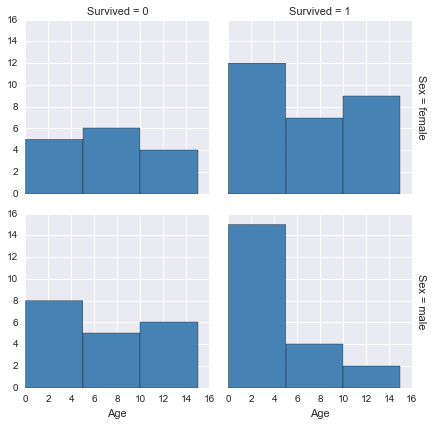

In [21]:
g3 = sns.FacetGrid(t3, row="Sex", col="Survived", margin_titles=True, row_order=["female", "male"])
age_bins3 = np.arange(0, 18, 5)
g3.map(plt.hist, 'Age', bins=age_bins3, color="steelblue")

### This chart really make it obvious - even among minors (look at 15 year olds), men were less likely to survive. It also suggests that even among minors, the older ones were less likely to survive. This calls for a regression to estimate the marginal effects on probability of survival.
### How will the box chart looks like for minors?

Axes(0.125,0.125;0.775x0.775)


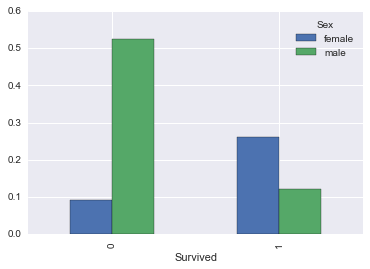

In [22]:
sgm = pd.DataFrame(pd.crosstab(t3.Survived, t3.Sex)) 
sgm2 = sg / float(sur_count.sum())
print sgm2.plot(kind='bar')

### Looks similiar to the overall chart above. Shows that Minor or not, males were still less likely to survive.


# Multivariate Plots And Analysis
### Distribution of survival by age faceted by gender

Overall linear probability plot.


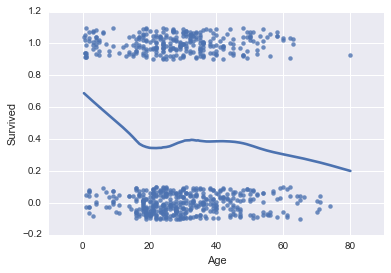

In [23]:
print ("Overall linear probability plot.")
sns.regplot(x='Age', y='Survived', data=t, y_jitter=0.1, lowess=True)
sns.despine()

For females


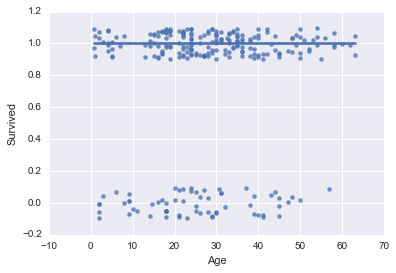

In [24]:
tm = t.loc[t.Sex=='male']
tf = t.loc[t.Sex=='female']
print ("For females")
sns.regplot(x='Age', y='Survived', data=tf, y_jitter=0.1, lowess=True)
sns.despine()

For males


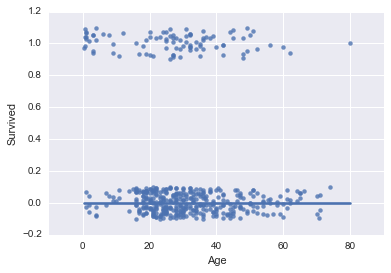

In [25]:
print ("For males")
sns.regplot(x='Age', y='Survived', data=tm, y_jitter=0.1, lowess=True)
sns.despine()

### Pretty stark difference by sex
### Let’s build a Linear probability model first
### Disclaimer: I will not create training/validation set and score as usual
### Linear probability model - Age and Pclass

In [26]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

res = pd.stats.api.ols(y=t2.Survived, x=t2[['Age','Pclass']])
print res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Age> + <Pclass> + <intercept>

Number of Observations:         714
Number of Degrees of Freedom:   3

R-squared:         0.1804
Adj R-squared:     0.1781

Rmse:              0.4455

F-stat (2, 711):    78.2577, p-value:     0.0000

Degrees of Freedom: model 2, resid 711

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
           Age    -0.0082     0.0012      -6.66     0.0000    -0.0106    -0.0058
        Pclass    -0.2635     0.0214     -12.30     0.0000    -0.3055    -0.2215
     intercept     1.2399     0.0722      17.16     0.0000     1.0983     1.3815
---------------------------------End of Summary---------------------------------



### Linear probability model - Age and Pclass and Sex

In [27]:
res2 = pd.stats.api.ols(y=t2.Survived, x=t2[['Age','Pclass','female']])
print res2


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Age> + <Pclass> + <female> + <intercept>

Number of Observations:         714
Number of Degrees of Freedom:   4

R-squared:         0.3902
Adj R-squared:     0.3876

Rmse:              0.3846

F-stat (3, 710):   151.4166, p-value:     0.0000

Degrees of Freedom: model 3, resid 710

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
           Age    -0.0055     0.0011      -5.04     0.0000    -0.0076    -0.0033
        Pclass    -0.2029     0.0189     -10.74     0.0000    -0.2399    -0.1659
        female     0.4793     0.0307      15.63     0.0000     0.4192     0.5394
     intercept     0.8468     0.0672      12.59     0.0000     0.7150     0.9786
---------------------------------End of Summary------

### Age and pclass stay negative and female has a positive sign - the signs are useful to us for significant parameters. 

### Let’s build a logistic regression to verify and get the odds as well.



In [28]:
print ("Check trained model coefficients - Age, Pclass, Female.")
logreg = linear_model.LogisticRegression()
Yvar = t2[['Survived']]
Xvar2 = t2[['Age','Pclass','female']]
log02 = logreg.fit(Xvar2, Yvar.values.ravel())
print(log02.coef_)
print ("The same signs as the linear model. That's good.")



Check trained model coefficients - Age, Pclass, Female.
[[-0.03069504 -1.14539506  2.41843788]]
The same signs as the linear model. That's good.


In [29]:
print ("Need to get exponentiate the parameters to get the odds ratios.")
coefs=log02.coef_
#not vectorized fn?
print np.exp(coefs)

Need to get exponentiate the parameters to get the odds ratios.
[[  0.96977127   0.31809822  11.22830565]]


### Interpretation: an extra year of age decreases the odds of surviving a factor of 0.96. Going from class 1 to 2 or 2 to 3 decreases the odds by a factor of 0.31. Finally, going from female to male decreases the odds by a factor of 0.08 or 11.2 times. That is females were 11 times more likely to survive that males. Also, as we have seen above, this holds true even among minors (< 18 years old) - females were more likely to survive.

# Final plots and summary
### Plot One: Bar charts of Survived and Gender

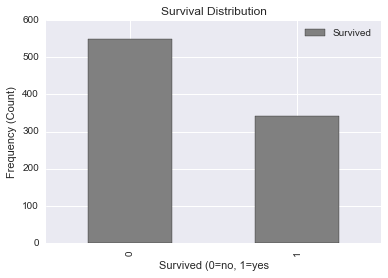

In [30]:
sur_count.plot(kind='bar',title='Survival Distribution',legend=True,color='grey')
#use the plt fn from matplotlib for additional customization
plt.ylabel('Frequency (Count)')
plt.xlabel('Survived (0=no, 1=yes')

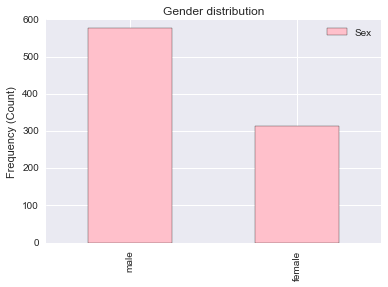

In [31]:
sex_count.plot(kind='bar',title='Gender distribution',legend=True,color='pink')
#use the plt fn from matplotlib for additional customization
plt.ylabel('Frequency (Count)')

In [32]:
print ("Here are the actual percentages for the charts above.")
print sur_count, "\n","\n", np.round(sur_count / sur_count.sum() * 100)
print "\n"
print sex_count, "\n","\n", np.round(sex_count / sex_count.sum() * 100)

Here are the actual percentages for the charts above.
   Survived
0       549
1       342 

   Survived
0      62.0
1      38.0


        Sex
male    577
female  314 

         Sex
male    65.0
female  35.0


### Plot One Discussion
### Interesting, the distributions of Survived and Sex are almost identical. That is 65% of passengers were male and 62% of passengers did not survive. Is there a link between being male and not surviving?

### Plot Two: Distribution of Age by Survived separately by Sex

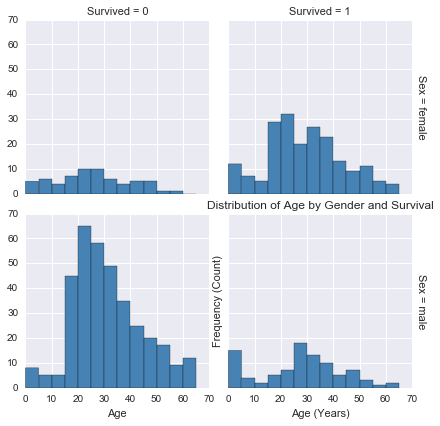

In [33]:
g = sns.FacetGrid(t, row="Sex", col="Survived", margin_titles=True, row_order=["female", "male"])
age_bins = np.arange(0, 70, 5)
g.map(plt.hist, 'Age', bins=age_bins, color="steelblue")
plt.ylabel('Frequency (Count)')
plt.xlabel('Age (Years)')
plt.title('Distribution of Age by Gender and Survival')
plt.show()
#Hmm - title is only for the last chart? oh, well

### Plot Two Discussion
### This plot looks like a mirror image: most of men did not survive, while most women did.

### Plot Three: Linear probability model by Sex

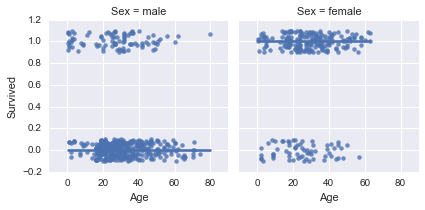

In [34]:
g = sns.FacetGrid(t, col="Sex", margin_titles=True)
g.map(sns.regplot, "Age", "Survived", lowess=True, y_jitter=.1);


### Plot Three Discussion
### The blue line can be interpreted as the predicted probability of surviving by age. For men this probability falls rapidly at 15 years old and stays pretty low. For women of all ages the probability of surviving is much higher.

# Issues, Reflections, Conclusions (Speculations)


Issues: What we have is an incomplete data set - obviously there were more than 891 passengers on Titanic. We can make no assumptions about whether we got a random sample or a biased one. Therefore we cannot really make any general conclusions but we can speculate about the results. 

There is missing data for Age. I did no imputations because I cannot make any assumptions whether the values are MCAR (missing completely at random). Those observations were just dropped by the R’s procedures when Age variable was invovled.

My exploratory data analysis suggested a link between survival and gender, so I pursued this and conducted statistical tests.
Chi-squared test of the frequency of survival based on gender (Sex) returned a very low p-value meaning this pattern could not have occurred by chance.

Both the linear and logistic probability models returned negative estimates for being male on survival.
The odds ratio of survival of being female comparing to being a male was 11.2.
This means that females were 11 times more likely to survive that males.

This pattern holds even for minors (< 18 years old) - females were still more likely to survive.
This seems to suggest that in the good old saying “women and children first” boys of 15 years or older do not count as “children.”

Next steps? In the future I could review other tragic events and disasters and analyze factors that influence the probability of survival. 


# Appendix: Data Dictionary

In [35]:
'''
Data source: https://www.kaggle.com/c/titanic/data

VARIABLE DESCRIPTIONS:
survival Survival
(0 = No; 1 = Yes)
pclass Passenger Class
(1 = 1st; 2 = 2nd; 3 = 3rd)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare
cabin Cabin
embarked Port of Embarkation
(C = Cherbourg; Q = Queenstown; S = Southampton)
'''
;

''

# The End.